In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
%matplotlib inline

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [6]:
import os
os.environ['KAGGLE_CONFIG_DIR'] = "/content/drive/MyDrive/Kaggle"

%cd /content/drive/MyDrive/Kaggle

!kaggle datasets download -d deffro/the-climate-change-twitter-dataset

/content/drive/MyDrive/Kaggle
the-climate-change-twitter-dataset.zip: Skipping, found more recently modified local copy (use --force to force download)


In [ ]:
!unzip \the-climate-change-twitter-dataset.zip  -d \the-climate-change-twitter-dataset && rm *.zip  

Archive:  the-climate-change-twitter-dataset.zip


In [7]:
# read dataset
df1 = pd.read_csv('the-climate-change-twitter-dataset/The Climate Change Twitter Dataset.csv')

In [9]:
# inspect first 5 rows
df1.head()

,created_at,id,lng,lat,topic,sentiment,stance,gender,temperature_avg,aggressiveness
0,2006-06-06 16:06:42+00:00,6132,NaN,NaN,Weather Extremes,-0.097180,neutral,female,NaN,aggressive
1,2006-07-23 21:52:30+00:00,13275,-73.949582,40.650104,Weather Extremes,0.575777,neutral,undefined,-1.114768,aggressive
2,2006-08-29 01:52:30+00:00,23160,NaN,NaN,Weather Extremes,0.500479,neutral,male,NaN,aggressive
3,2006-11-07 02:46:52+00:00,57868,NaN,NaN,Weather Extremes,0.032816,neutral,male,NaN,aggressive
4,2006-11-27 14:27:43+00:00,304553,NaN,NaN,Importance of Human Intervantion,-0.090428,neutral,male,NaN,aggressive


In [7]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15789411 entries, 0 to 15789410
Data columns (total 10 columns):
 #   Column           Dtype  
---  ------           -----  
 0   created_at       object 
 1   id               int64  
 2   lng              float64
 3   lat              float64
 4   topic            object 
 5   sentiment        float64
 6   stance           object 
 7   gender           object 
 8   temperature_avg  float64
 9   aggressiveness   object 
dtypes: float64(4), int64(1), object(5)
memory usage: 1.2+ GB


In [8]:
# check for null values
df1.isnull().any()

created_at         False
id                 False
lng                 True
lat                 True
topic              False
sentiment          False
stance             False
gender             False
temperature_avg     True
aggressiveness     False
dtype: bool

In [13]:
#check for number of null values
df1.isnull().sum()

created_at                0
id                        0
lng                10481873
lat                10481873
topic                     0
sentiment                 0
stance                    0
gender                    0
temperature_avg    10481873
aggressiveness            0
dtype: int64

In [8]:
# drop null values / anyway the dataset is already big->histograms patterns don't change ->distribution=same
df1.dropna(inplace=True)

In [9]:
# inspect .dropna() results
df1.isnull().sum()

created_at         0
id                 0
lng                0
lat                0
topic              0
sentiment          0
stance             0
gender             0
temperature_avg    0
aggressiveness     0
dtype: int64

In [11]:
# check for duplicated id's
df1.id.duplicated().sum()

0

In [17]:
# tweets topics labels
df1.topic.value_counts()

Global stance                                 1462525
Importance of Human Intervantion               889463
Weather Extremes                               761129
Politics                                       618945
Undefined / One Word Hashtags                  458904
Donald Trump versus Science                    333777
Seriousness of Gas Emissions                   291323
Ideological Positions on Global Warming        176568
Impact of Resource Overconsumption             164996
Significance of Pollution Awareness Events     149908
Name: topic, dtype: int64

In [12]:
# stance labels
df1.stance.value_counts()

believer    11292424
neutral      3305601
denier       1191386
Name: stance, dtype: int64

In [14]:
# gender labels
df1.gender.value_counts()

male         10307402
female        4895134
undefined      586875
Name: gender, dtype: int64

In [15]:
# aggressiveness labels
df1.aggressiveness.value_counts()

not aggressive    11262144
aggressive         4527267
Name: aggressiveness, dtype: int64

In [18]:
# statistics about sentiment value
df1.sentiment.describe()

count    5.307538e+06
mean     1.717972e-02
std      4.407791e-01
min     -9.929233e-01
25%     -3.856096e-01
50%      9.962937e-03
75%      4.308393e-01
max      9.895709e-01
Name: sentiment, dtype: float64

In [10]:
# convert a feature to datetime Dtype
df1['created_at'] = pd.to_datetime(df1['created_at'])

In [20]:
# check values information again for Dtype changes
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5307538 entries, 1 to 15789408
Data columns (total 10 columns):
 #   Column           Dtype              
---  ------           -----              
 0   created_at       datetime64[ns, UTC]
 1   id               int64              
 2   lng              float64            
 3   lat              float64            
 4   topic            object             
 5   sentiment        float64            
 6   stance           object             
 7   gender           object             
 8   temperature_avg  float64            
 9   aggressiveness   object             
dtypes: datetime64[ns, UTC](1), float64(4), int64(1), object(4)
memory usage: 445.4+ MB


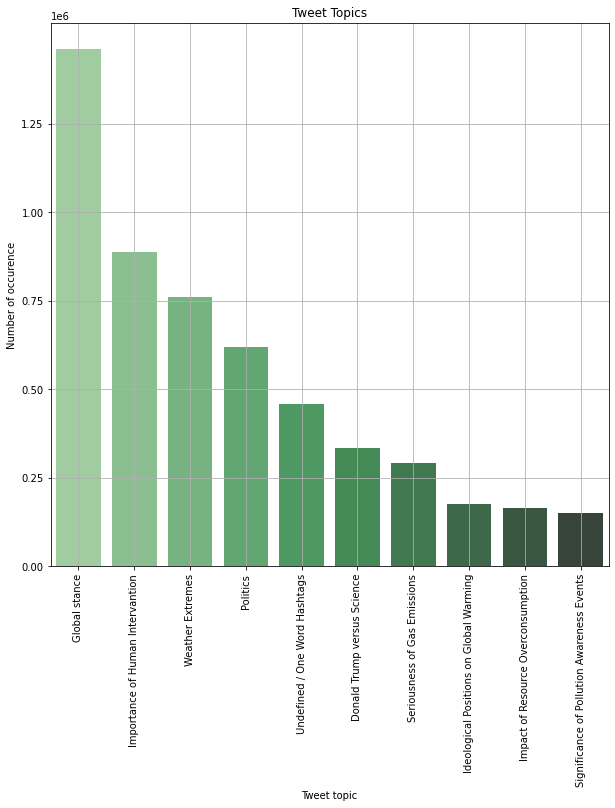

In [22]:
  # plot frequency of every tweet topic (sorted by descending order)
  plt.figure(figsize=(10,10))
  plt.title("Tweet Topics")
  sns.countplot(x="topic",
                data=df1,
                palette='Greens_d', 
                order = df1['topic'].value_counts().index)
  plt.yticks(range(0,1_500_000,250_000))
  plt.xlabel("Tweet topic")
  plt.ylabel("Number of occurence")
  plt.xticks(rotation=90)
  plt.grid(True)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f5ccbcfe910>,
      dtype=object)

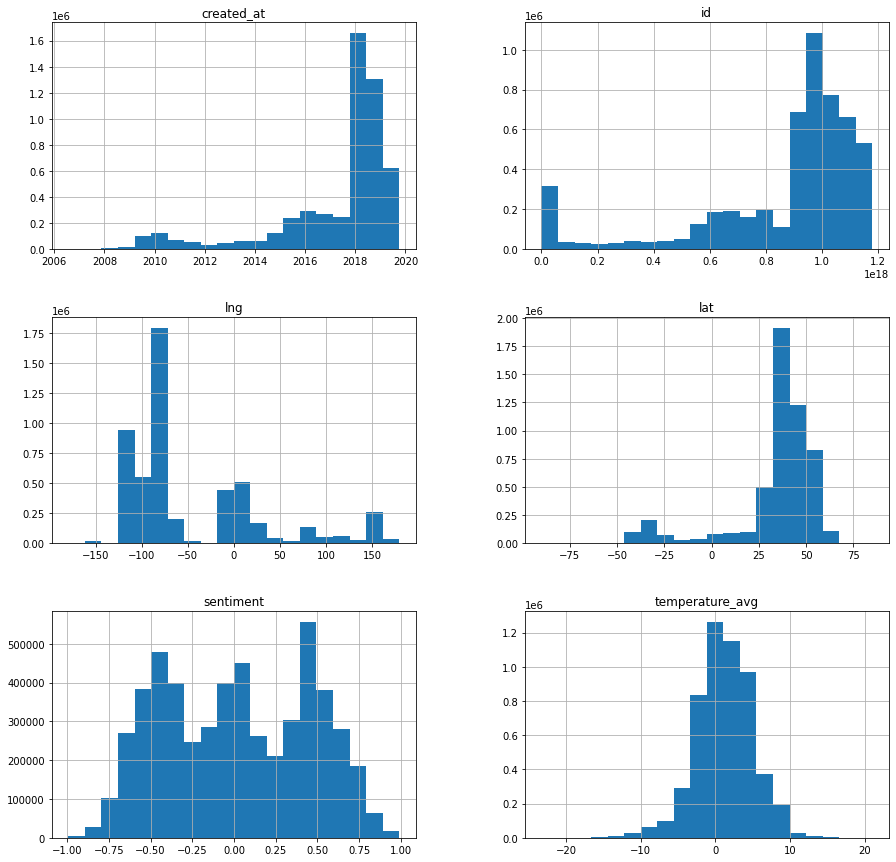

In [23]:
# plot histograms of numeric values
df1.hist(bins=20, figsize=(15,15))

In [11]:
# sampling in order efficient RAM usage
sample_1 = df1.sample(n=100_000)
sample_1.head()

,created_at,id,lng,lat,topic,sentiment,stance,gender,temperature_avg,aggressiveness
5269003,2017-10-01 06:42:14+00:00,914379915344203776,12.482932,41.893320,Seriousness of Gas Emissions,0.063514,believer,male,-0.443854,not aggressive
3870617,2016-05-09 04:30:09+00:00,729528861642268672,151.207320,-33.867850,Seriousness of Gas Emissions,0.000827,believer,female,3.686689,aggressive
11798482,2018-10-08 17:27:22+00:00,1049350553610936320,-1.264906,52.531021,Undefined / One Word Hashtags,0.577564,believer,male,4.852390,not aggressive
129386,2009-06-20 04:36:15+00:00,2249033585,-116.784670,34.687430,Weather Extremes,0.557345,neutral,female,-1.312471,not aggressive
14325099,2019-04-24 19:24:52+00:00,1121132920314449920,0.572920,50.855190,Importance of Human Intervantion,0.666235,believer,female,3.867976,not aggressive


In [ ]:
sns.scatterplot(x='temperature_avg',y='sentiment',data=sample_1, hue ='topic',palette='tab10') 

Text(0.5, 1.0, 'Agressiveness distribution per temperature deviation')

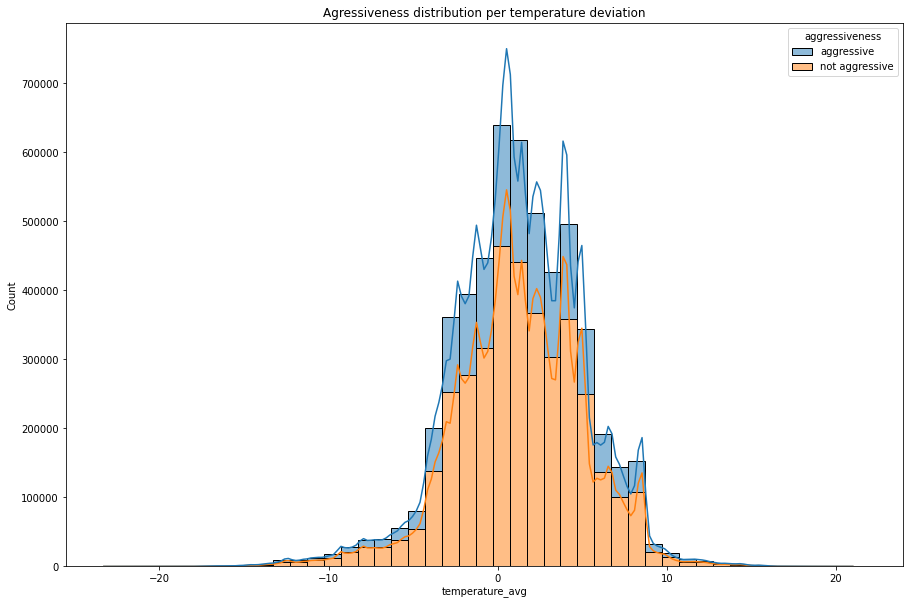

In [13]:
plt.figure(figsize=(15,10))
sns.histplot(x="temperature_avg", data=df1, hue="aggressiveness", binwidth=1, kde=True, multiple= "stack")
plt.title("Agressiveness distribution per temperature deviation")

In [12]:
import plotly.express as px

fig = px.scatter_geo(sample_1,lat='lat',lon='lng', hover_name="temperature_avg")
fig.update_layout(title = 'Significant twitter post respect to temperature average', title_x=0.5)
fig.show()